### 1. Importing dependancies

In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #this is the model we are using here (not deep diving) //derived from sigmoid
from sklearn.metrics import (
                                classification_report,
                                confusion_matrix,
                                roc_auc_score,
                                accuracy_score,
                                roc_curve,
                                precision_recall_curve,
                                f1_score,
                                precision_score,
                                recall_score
                                )

warnings.filterwarnings('ignore')

### 2. Quick Overview on Logistic Regression

Y_hat(Z) = 1 / (1 + exp(-Z))

P(Y = 1 | X) = Y_hat(Z)

In [5]:
seed = 42
np.random.seed(seed)

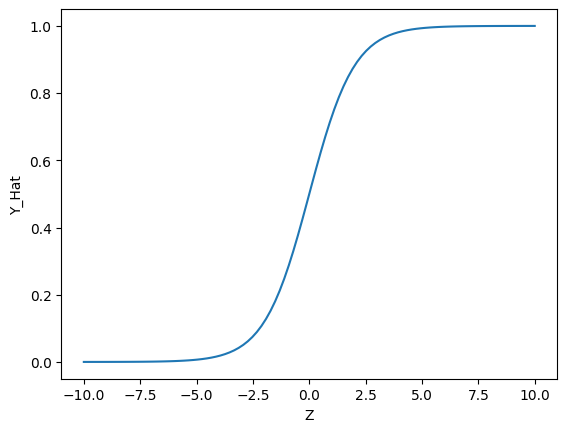

In [6]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_Hat')
plt.show()


### 3. Loading the Data

In [7]:
X_train = np.load('artifacts\X_train.npz') ['arr_0']
Y_train = np.load('artifacts\Y_train.npz')  ['arr_0']
X_test = np.load('artifacts\X_test.npz')  ['arr_0']
Y_test = np.load('artifacts\Y_test.npz')  ['arr_0']

### 4. Training the Model

In [8]:
model_lr = LogisticRegression(
                                random_state = 42, #random seed means that if you do random operations if you are not setting a state it will always produce different results
                                max_iter = 1000  #how many iterations //if increase training time might be bit high
                                )

model_lr.fit(X_train, Y_train) 

LogisticRegression(max_iter=1000, random_state=42)

### 6. Inference

Y_hat = Y_hat_proba > 0.5  (this is the universal value using here)

but in class inbalance situations like this cases this is not excatly clear, why,
- in this case in 'test set' the classes are well over inbalanced
    - '0' values are 1623
    - '1' values are 376
- so in this case  the model is tend to biased towards '0', because there are more 0 values than 1

In [11]:
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

#### 6.1 Checking the class balance

##### 6.1.1 Train set

In [18]:
pd.Series(Y_train).value_counts()

0    6334
1    6334
Name: count, dtype: int64

##### 6.1.2 Test set

In [19]:
pd.Series(Y_test).value_counts()

0    1623
1     376
Name: count, dtype: int64

In [12]:
Y_hat_train

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [13]:
Y_proba_train

array([[0.83191774, 0.16808226],
       [0.91485291, 0.08514709],
       [0.74754112, 0.25245888],
       ...,
       [0.46464907, 0.53535093],
       [0.36871924, 0.63128076],
       [0.70486062, 0.29513938]])

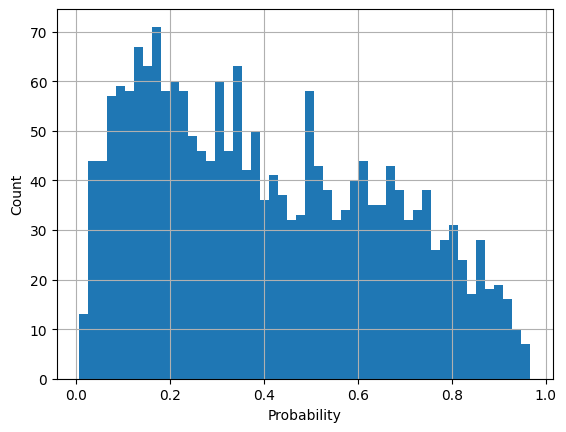

In [24]:
Y_lr_test = Y_proba_test[:, 1]

plt.hist(Y_lr_test, bins=50)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.grid(True)

plt.show()

In this case we can excatly see how this is biased(right skewed). in that case we can change the thresholds to see how it varies. in these cases you need to tweak the values to get it to a normal distribution like view....

In [ ]:
Y_hat_test = Y_lr_test > 0.65   #increase this value what will happenes to the values.
Y_hat_test

array([False, False, False, ..., False, False,  True])

- if you moving your threshold towards <'1', what will happen to the '480' = decrease
- if you moving your threshold towards <'1', what will happen to the '130' = increase
---
- if you moving your threshold lower than >'1', what will happen to the '480' = increase
- if you moving your threshold lower than >'1', what will happen to the '480' = decrease

There are more FP than FNs

### 7. Evaluation

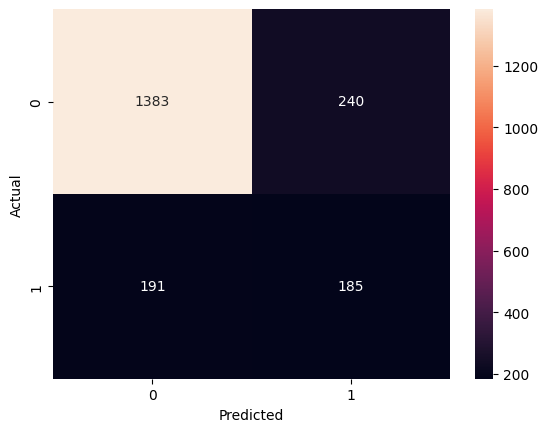

In [53]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

- now the '0.65' would be sort of balanced the cm. (not best but sort of) - not an ideal way
- there are more ways than adjusting this by manually, using true positive rate and false positive rate also (ROC, AUC) 

its like this:

1. when 'actual' value is '0', model predicted it as '0' would be = 1143 values (True Negative)
2. when 'actual' value is '0', model predicted it as '1' would be = 480 values (False Positive)
3. when 'actual' value is '1', model predicted it as '0' would be = 130 values (False Negative)
4. when 'actual' value is '1', model predicted it as '1' would be = 246 values (True Positive)